In [1]:
### main script to call preprocessing routines and run ML models 

# import preprocessing routine
from preprocess_module import fraud_preprocessor

# call preprocessor 
full_df = fraud_preprocessor(i_flag=0)

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd

In [2]:
full_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'ClaimMonth', 'HospitalDuration', 'ClaimDuration',
       'PatientType', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       '

In [4]:
exclude_features = ['BeneID', 'ClaimID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt',
                    'AttendingPhysician', 'OperatingPhysician','OtherPhysician',
                   'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode','ClmDiagnosisCode_1', 
                    'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4', 
                    'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 
                    'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10', 
                    'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3', 'ClmProcedureCode_4', 
                    'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                    'ChronicCond_KidneyDisease', 'ChronicCond_Cancer','ChronicCond_ObstrPulmonary', 
                    'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
                    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']
full_df2 = full_df.drop(exclude_features, axis=1)
full_df2.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimMonth,HospitalDuration,ClaimDuration,PatientType,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,26000.0,1068.0,4,6.0,6,Inpatient,1943-01-01,0,1,1,0,39,230,12,12,36000.0,3204.0,60.0,70.0,1
1,26000.0,1068.0,4,6.0,6,Inpatient,1943-01-01,0,1,1,0,39,230,12,12,36000.0,3204.0,60.0,70.0,1
2,19000.0,1068.0,1,12.0,12,Inpatient,1913-12-01,0,2,1,0,39,230,12,12,19000.0,1068.0,100.0,20.0,1
3,17000.0,1068.0,10,18.0,18,Inpatient,1922-10-01,0,1,1,0,39,600,12,12,17000.0,1068.0,1050.0,540.0,1
4,13000.0,1068.0,10,4.0,4,Inpatient,1930-07-01,0,2,1,0,39,280,12,12,27000.0,2136.0,450.0,160.0,1


In [14]:
full_df2.columns

Index(['ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed',
       'AdmissionDt', 'DeductibleAmtPaid', 'DischargeDt', 'ClaimMonth',
       'HospitalDuration', 'ClaimDuration', 'PatientType', 'Claimduration',
       'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'PotentialFraud'],
      dtype='object')

In [5]:
import seaborn as sns

## Insc Claim Amount Reimbursed for In/Outpatient

Text(0.5, 0, 'Outpatient')

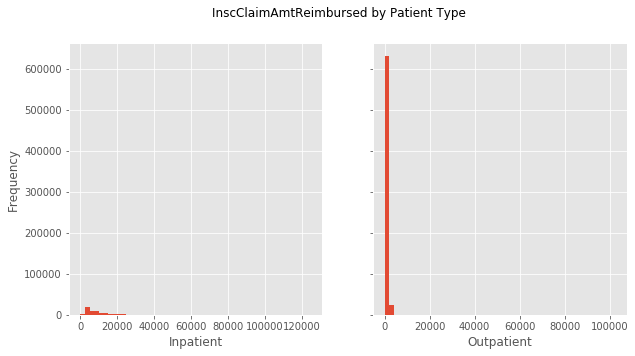

In [108]:
full_df0 = full_df2[full_df2.InscClaimAmtReimbursed > 10]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey = True)
fig.suptitle('InscClaimAmtReimbursed by Patient Type')
ax1.hist(full_df0[full_df0.PatientType == 'Inpatient']['InscClaimAmtReimbursed'], bins = 50)
ax1.set_xlabel('Inpatient')
ax1.set_ylabel('Frequency')
ax2.hist(full_df0[full_df0.PatientType == 'Outpatient']['InscClaimAmtReimbursed'], bins = 50)
ax2.set_xlabel('Outpatient')

Text(0.5, 0, 'Outpatient')

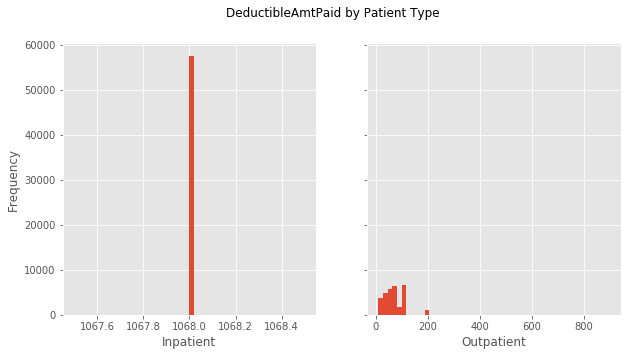

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('DeductibleAmtPaid by Patient Type')
full_df11 = full_df2.copy()
full_df11 = full_df11[full_df11.DeductibleAmtPaid != 0]
ax1.hist(full_df11[full_df11.PatientType == 'Inpatient']['DeductibleAmtPaid'], bins = 50)
ax1.set_xlabel('Inpatient')
ax1.set_ylabel('Frequency')
ax2.hist(full_df11[full_df11.PatientType == 'Outpatient']['DeductibleAmtPaid'], bins = 50)
ax2.set_xlabel('Outpatient')

In [7]:
full_df2['coveredPercentage'] = full_df2.InscClaimAmtReimbursed/(full_df2.InscClaimAmtReimbursed+full_df2.DeductibleAmtPaid)

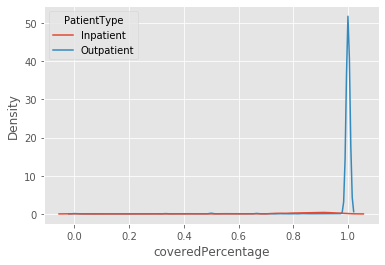

In [21]:
sns.kdeplot(data=full_df2, x="coveredPercentage", hue="PatientType")

Text(0.5, 0, 'Outpatient')

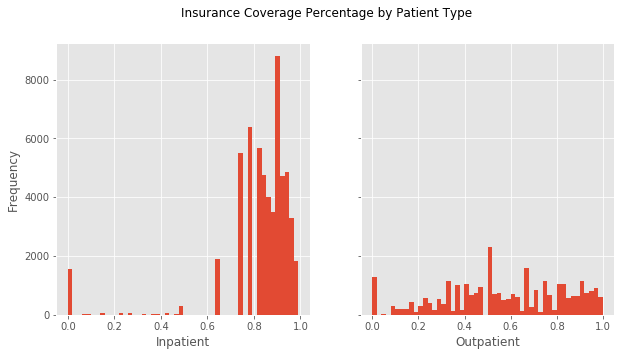

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey = True)
fig.suptitle('Insurance Coverage Percentage by Patient Type')
coverage = full_df2.copy()
coverage = coverage[coverage.coveredPercentage < 1]
ax1.hist(coverage[coverage.PatientType == 'Inpatient']['coveredPercentage'], bins = 50)
ax1.set_xlabel('Inpatient')
ax1.set_ylabel('Frequency')
ax2.hist(coverage[coverage.PatientType == 'Outpatient']['coveredPercentage'], bins = 50)
ax2.set_xlabel('Outpatient')

## Claim Duration by Fraudulent Activity

Text(0.5, 0, 'Non-fraudulent')

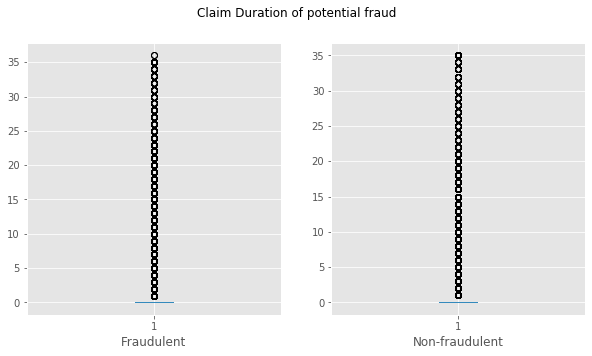

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Claim Duration of potential fraud')
ax1.boxplot(full_df2[full_df2.PotentialFraud == 1]['ClaimDuration'])
ax1.set_xlabel('Fraudulent')
#ax.violinplot(data, showmeans=False, showmedians=True)


#ax1.set_ylabel('Frequency')
ax2.boxplot(full_df2[full_df2.PotentialFraud == 0]['ClaimDuration'])
ax2.set_xlabel('Non-fraudulent')

Text(0.5, 0, 'Non-Fraudulent')

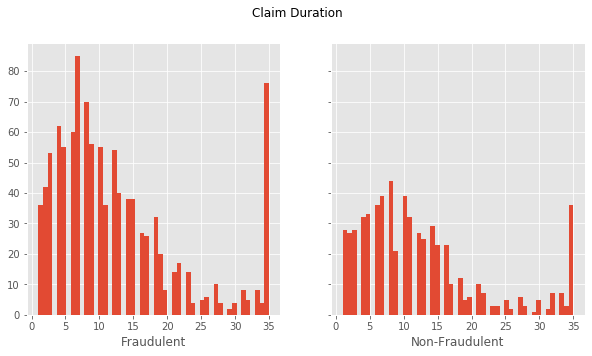

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey = True)
fig.suptitle('Claim Duration')
full_df3 = full_df3[full_df3.ClaimDuration !=0]

ax1.hist(full_df3[full_df3.PotentialFraud == 1]['ClaimDuration'], bins = 50)
ax1.set_xlabel('Fraudulent')
#ax1.set_ylabel('Frequency')
ax2.hist(full_df3[full_df3.PotentialFraud == 0]['ClaimDuration'], bins = 50)
ax2.set_xlabel('Non-Fraudulent')

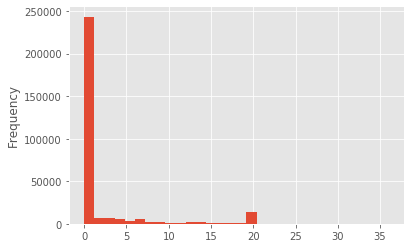

In [39]:
full_df2[full_df2.PotentialFraud == 1]['ClaimDuration'].plot(kind='hist', bins = 30)

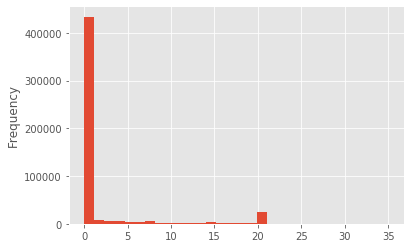

In [38]:
full_df2[full_df2.PotentialFraud == 0]['ClaimDuration'].plot(kind='hist', bins=30)

In [42]:
full_df2.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimMonth',
       'HospitalDuration', 'ClaimDuration', 'PatientType', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud',
       'coveredPercentage'],
      dtype='object')

## Total Claim Amount 

Text(0.5, 0, 'Non-Fraudulent')

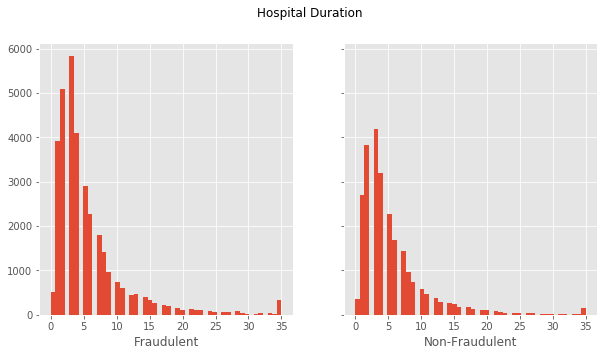

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey = True)
fig.suptitle('Hospital Duration')
#full_df3 = full_df3[full_df3.ClaimDuration !=0]

ax1.hist(full_df2[full_df2.PotentialFraud == 1]['HospitalDuration'], bins = 50)
ax1.set_xlabel('Fraudulent')
#ax1.set_ylabel('Frequency')
ax2.hist(full_df2[full_df2.PotentialFraud == 0]['HospitalDuration'], bins = 50)
ax2.set_xlabel('Non-Fraudulent')

In [85]:
full_df2['totalClaimAmt'] = full_df2.InscClaimAmtReimbursed + full_df2.DeductibleAmtPaid

Text(0.5, 0, 'Non-Fraudulent')

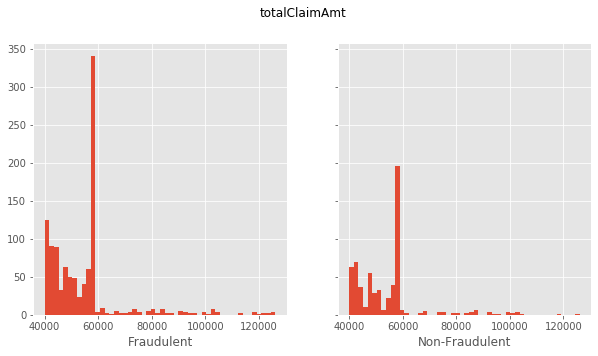

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('totalClaimAmt')
full_df3 = full_df2.copy()
full_df3 = full_df3[full_df3.totalClaimAmt >40000]

ax1.hist(full_df3[full_df3.PotentialFraud == 1]['totalClaimAmt'], bins = 50)
ax1.set_xlabel('Fraudulent')
#ax1.set_ylabel('Frequency')
ax2.hist(full_df3[full_df3.PotentialFraud == 0]['totalClaimAmt'], bins = 50)
ax2.set_xlabel('Non-Fraudulent')

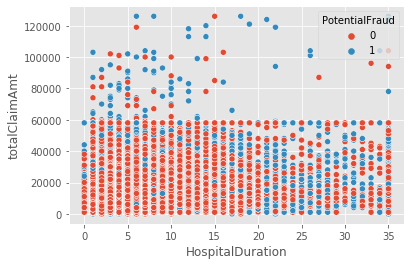

In [44]:
full_df2['totalClaimAmt'] = full_df2.InscClaimAmtReimbursed + full_df2.DeductibleAmtPaid
sns.scatterplot(x='HospitalDuration', y = 'totalClaimAmt', data=full_df2, hue='PotentialFraud')

## Average Daily Charge

Text(0.5, 1.0, 'Average Daily Claim Charge')

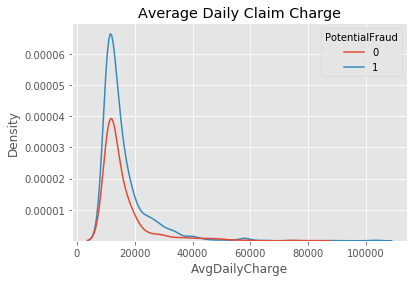

In [79]:
# import numpy as np
full_df3 = full_df2.copy()
full_df3 = full_df3[full_df3.ClaimDuration !=0]
full_df3 = full_df3[full_df3.totalClaimAmt !=0]
full_df3['AvgDailyCharge'] = full_df3['totalClaimAmt']/(full_df3['ClaimDuration'])
full_df3 = full_df3[full_df3.AvgDailyCharge > 10000]

sns.kdeplot(x = 'AvgDailyCharge', hue = 'PotentialFraud', data=full_df3)
plt.title('Average Daily Claim Charge')

Text(0.5, 0, 'Non-Fraudulent')

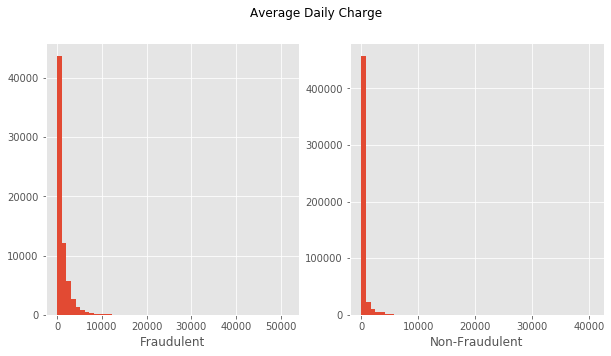

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Average Daily Charge')
full_df3 = full_df3[full_df3.ClaimDuration !=0]

ax1.hist(full_df3[full_df3.PotentialFraud == 1]['AvgDailyCharge'], bins = 50)
ax1.set_xlabel('Fraudulent')
#ax1.set_ylabel('Frequency')
ax2.hist(full_df2[full_df2.PotentialFraud == 0]['AvgDailyCharge'], bins = 50)
ax2.set_xlabel('Non-Fraudulent')

### Warmup Question 5: From Which Providers Do the Duplicated Claims Come From?

In [110]:
op_train = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
ip_train = pd.read_csv('Train_Inpatientdata-1542865627584.csv')

In [146]:
op_train.columns
op_train.fillna(-1, inplace=True)
ip_train.fillna(-1, inplace=True)

- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.

In [141]:
op_train['duplicated'] = op_train.duplicated(subset = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ClmAdmitDiagnosisCode', 'BeneID'])

In [149]:
print('Number of Duplicated Out Patients with same Codes: ', op_train['duplicated'].sum(), "\nOut of a total of: ", op_train.shape[0])

Number of Duplicated Out Patients with same Codes:  919 
Out of a total of:  517737


In [148]:
ip_train['duplicated'] = ip_train.duplicated(subset = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ClmAdmitDiagnosisCode', 'BeneID'])

In [150]:
print('Number of Duplicated InPatients with same Codes: ', ip_train['duplicated'].sum(), "\nOut of a total of: ", ip_train.shape[0])

Number of Duplicated InPatients with same Codes:  17 
Out of a total of:  40474


In [151]:
op_train['all_duplicates'] = op_train.duplicated(subset = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ClmAdmitDiagnosisCode', 'BeneID'], keep=False)

In [154]:
op_train.columns


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'duplicated', 'all_duplicates'],
      dtype='object')

#### Providers that have duplicate claims

In [160]:
op_train[op_train.all_duplicates == True].groupby('Provider')['BeneID'].count().sort_values(ascending=False)

Provider
PRV51459    21
PRV56011    18
PRV53918    15
PRV51574    15
PRV51244    13
            ..
PRV54681     1
PRV54662     1
PRV54634     1
PRV54588     1
PRV54276     1
Name: BeneID, Length: 898, dtype: int64

In [178]:
full_df6 = full_df.copy()
full_df6['all_duplicates'] = full_df6.duplicated(subset = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ClmAdmitDiagnosisCode', 'BeneID', 'Provider'], keep=False)

In [179]:
full_df6[full_df6.all_duplicates == True].groupby('Provider')['BeneID', 'PotentialFraud'].count().sort_values(by = 'BeneID', ascending=False)

/home/annie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BeneID,PotentialFraud
Provider,,
PRV51459,6340,6340
PRV53797,4300,4300
PRV53918,3550,3550
PRV55215,3242,3242
PRV52628,2748,2748
...,...,...
PRV52012,2,2
PRV54509,2,2
PRV53839,2,2


In [180]:
flagProviders = full_df6[full_df6.all_duplicates == True]['Provider'].unique()

In [182]:
#full_df[full_df.Provider in flagProviders]['PotentialFraud']
test = full_df[full_df.Provider.isin(flagProviders)][['Provider', 'PotentialFraud']].drop_duplicates()
print("Number of Fraudulent Providers that have duplicate claims: ", test.PotentialFraud.sum(), 
     "\nOut of ", len(test.PotentialFraud), " Total Providers with Duplicate Claims")
#len(test.PotentialFraud)

Number of Fraudulent Providers that have duplicate claims:  506 
Out of  5100  Total Providers with Duplicate Claims
